<a href="https://colab.research.google.com/github/ORCT/ds-section1-project/blob/main/Q3.max_sold_game_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스


In [1]:
from google.colab import files
files.upload();

Saving pre_vgames.csv to pre_vgames.csv


In [2]:
import pandas as pd

df = pd.read_csv('pre_vgames.csv',index_col=0)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


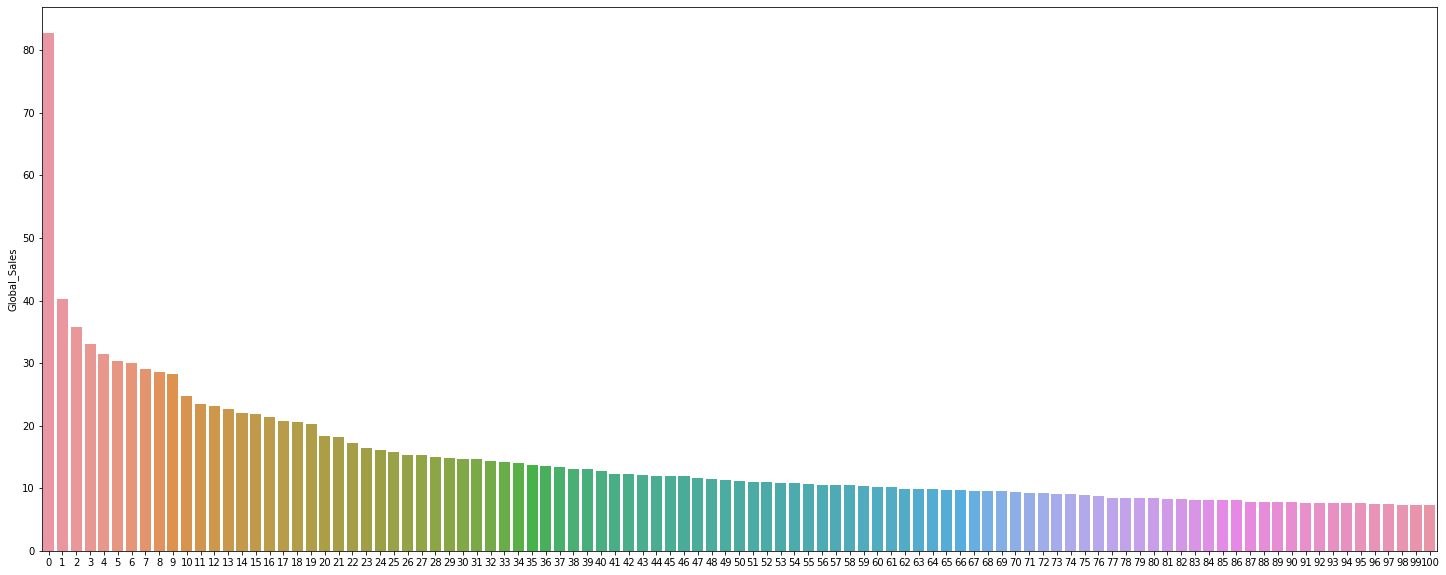

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df_descending = df.sort_values('Global_Sales',ascending=False).reset_index(drop=True).loc[0:100,:]

plt.figure(figsize=(25,10))
sns.barplot(x=df_descending.index,y=df_descending['Global_Sales'])#10번째에서 점프하는 구간이 있고 20번째에서 점프하는 구간이 있으니 편한대로 선택해도 될 것 같다.

In [11]:
df_top_10 = df.sort_values('Global_Sales',ascending=False).reset_index(drop=True).loc[0:9,:]
df_top_10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


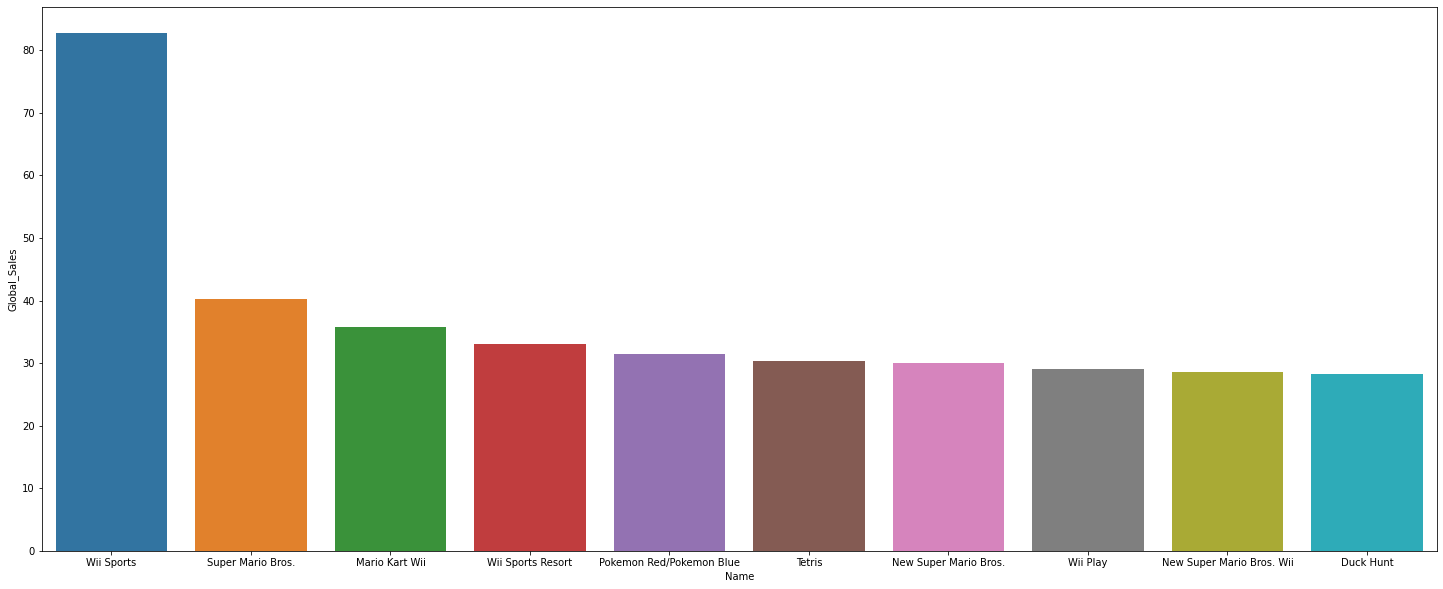

In [12]:
plt.figure(figsize=(25,10))
sns.barplot(x=df_top_10['Name'],y=df_top_10['Global_Sales'])

10개의 타이틀 모두 닌텐도 사에서 발매한 게임임을 알 수 있다. 그 중에서도 5개는 Wii 플랫폼으로 출시가 되었던 게임으로 Wii의 보급률이 상당했음을 짐작할 수 있다.

그렇다면 단일 타이틀 최다 판매량은 스포츠 장르니까 우리는 스포츠 게임의 설계를 해야하는 것일까? 사실 그렇게 단순하게 분석할 수는 없다. 스포츠 장르에서도 위 스포츠는 상당히 이질적인데, 피파 같은 대표적인 스포츠 장르의 게임과 위 스포츠는 다른 양상을 보인다.

위 스포츠는 단순히 스포츠 장르의 게임 타이틀이라기 보다 모션 인식 시스템을 이용한 피트니스가 결합된 제품이라고 봐야한다. 가정에서 가족들이 함께 몸을 움직이면서 놀 수 있는 놀이를 게임 타이틀로서 승화시킨 타이틀이라고 보는 것이 맞을 것이다.

실제로 닌텐도 사의 게임 철학은 모든 사람이 함께 어울려 놀 수 있는 것을 지향하고 있으니 위 스포츠는 닌텐도의 정신이 담겨있는 새로운 놀이라고 보는 것이 맞을 것 같다.

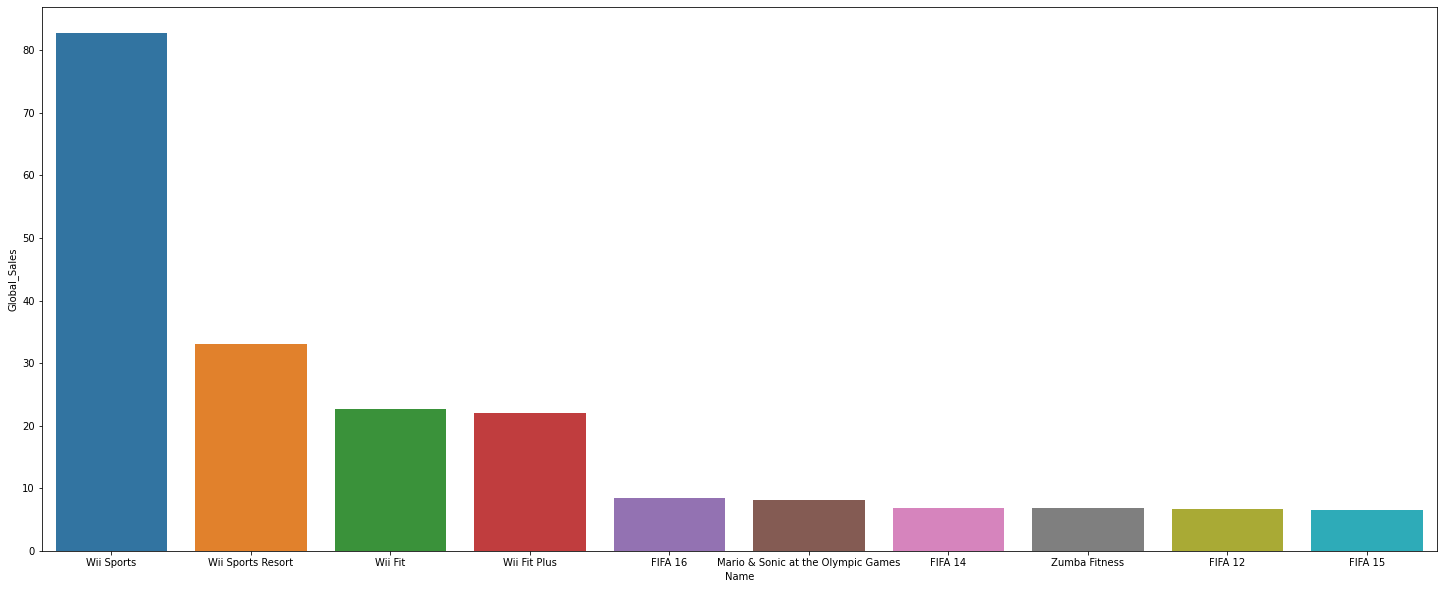

In [20]:
sports = df[df['Genre'] == 'Sports']
sports_top_10 = sports.sort_values('Global_Sales',ascending=False).reset_index(drop=True).loc[0:9,:]

plt.figure(figsize=(25,10))
sns.barplot(x=sports_top_10['Name'],y=sports_top_10['Global_Sales'])

위에서도 스포츠 게임 상위 10개 중 피트니스적 성향을 띄고 있는 위 스포츠 및 핏 시리즈가 상위권은 전부 석권하고 각각의 단일 판매량이 FIFA 16의 판매량보다 월등하게 판매량이 높은 것을 알 수 있다.

그렇다면 각각의 모든 시리즈를 모아보면 어떨까

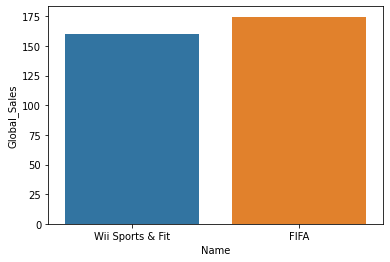

In [22]:
fifa = df[df['Name'].str.contains('FIFA')]
tmp = pd.DataFrame({'Name':['Wii Sports & Fit', 'FIFA'], 'Global_Sales':[sports_top_10.loc[0:3,'Global_Sales'].sum(), fifa['Global_Sales'].sum()]})

sns.barplot(x=tmp['Name'],y=tmp['Global_Sales'])

In [23]:
fifa_17 = df[df['Name'] == 'FIFA 17']
fifa_17

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7436,FIFA 17,X360,2016,Sports,Electronic Arts,0.03,0.13,0.00,0.01,0.17
10430,FIFA 17,PS3,2016,Sports,Electronic Arts,0.02,0.29,0.01,0.05,0.37
12561,FIFA 17,PC,2016,Sports,Electronic Arts,0.00,0.05,0.00,0.00,0.05
15364,FIFA 17,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.78
16217,FIFA 17,XOne,2016,Sports,Electronic Arts,0.17,1.26,0.00,0.10,1.53


각각의 시리즈를 모두 모았을 때는 FIFA 시리즈의 판매량이 더 높은 것을 알 수 있는데 이는 FIFA의 경우 위 스포츠 시리즈와 다르게 모든 게임 플랫폼으로 출시가 되기 때문이다.

In [27]:
a_and_s = df[(df['Genre'] == 'Sports') | (df['Genre'] == 'Action')]
a_s_top_10 = a_and_s.sort_values('Global_Sales',ascending=False).reset_index(drop=True).loc[0:9,:]
#GTA5는 멀티플랫폼이라 합계를 구하고 플롯을 해야할 듯
a_s_top_10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
2,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
3,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
4,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
5,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
6,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
7,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
8,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
9,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99


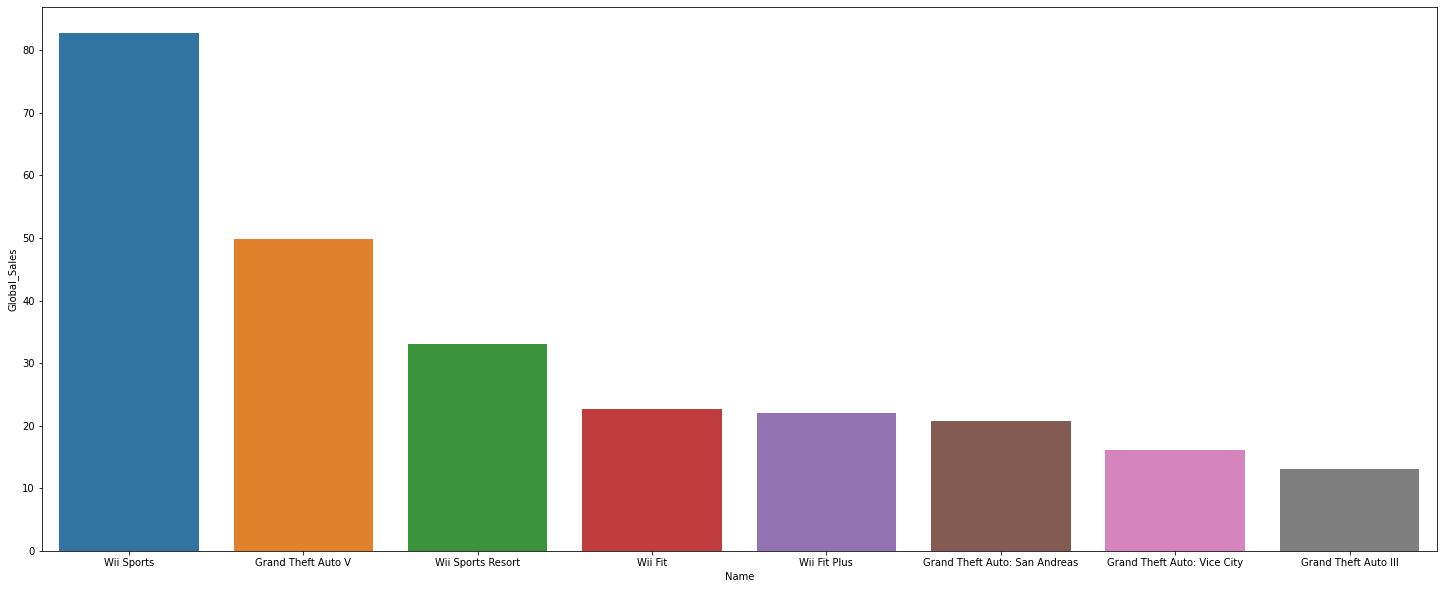

In [40]:
as_tmp = a_s_top_10.drop([4,6,9])
as_tmp1 = pd.DataFrame({'Name':[i for i in as_tmp['Name']], 'Global_Sales':[i for i in as_tmp['Global_Sales']]})
as_tmp1.loc[len(as_tmp1)] = ['Grand Theft Auto V', a_s_top_10.loc[4,'Global_Sales'] + a_s_top_10.loc[6,'Global_Sales'] + a_s_top_10.loc[9,'Global_Sales']]
as_tmp1 = as_tmp1.sort_values('Global_Sales', ascending = False)
# as_tmp = pd.DataFrame({'Name':[i for i in a_s_top_10['Name']]})
plt.figure(figsize=(25,10))
sns.barplot(x=as_tmp1['Name'],y=as_tmp1['Global_Sales'])

이번에는 액션과 스포츠 두 장르에서 출고량 TOP 10을 추렸더니 1위는 Wii Sports, 2위는 GTA5임을 알 수 있다.

GTA5는 멀티 플랫폼으로 출시 되었음에도 불구하고 Wii Sports의 출고량을 따라 잡지 못하는 것으로 미루어 볼 때 Wii Sports의 아성이 얼마나 대단했는지를 다시 한 번 알 수 있다.

In [35]:
#이번엔 플랫폼 별로 출고량을 확인해보자
df['Platform'].unique()#너무 많고 옛날 플랫폼도 많으니까 최근 5년에 게임 발매가 됐던 플랫폼만 보자
recent_game = df[df['Year'] >= 2016]
recent_game['Platform'].unique()#PS4, XOne, PC

array(['PS4', 'PS3', 'X360', 'PSV', 'PC', 'WiiU', '3DS', 'XOne', 'DS'],
      dtype=object)

공식적으로 단종된 플랫폼을 제외하고 최근까지 신작 게임이 발매가 되었던 플랫폼(PS4, XOne, PC)별로 장르와 게임을 알아보자.


In [42]:
ps4 = df[df['Platform'] == 'PS4']
xone = df[df['Platform'] == 'XOne']
pc = df[df['Platform'] == 'PC']

len(ps4), len(xone), len(pc) # 각 플랫폼 별 게임 타이틀 개수

(336, 213, 955)

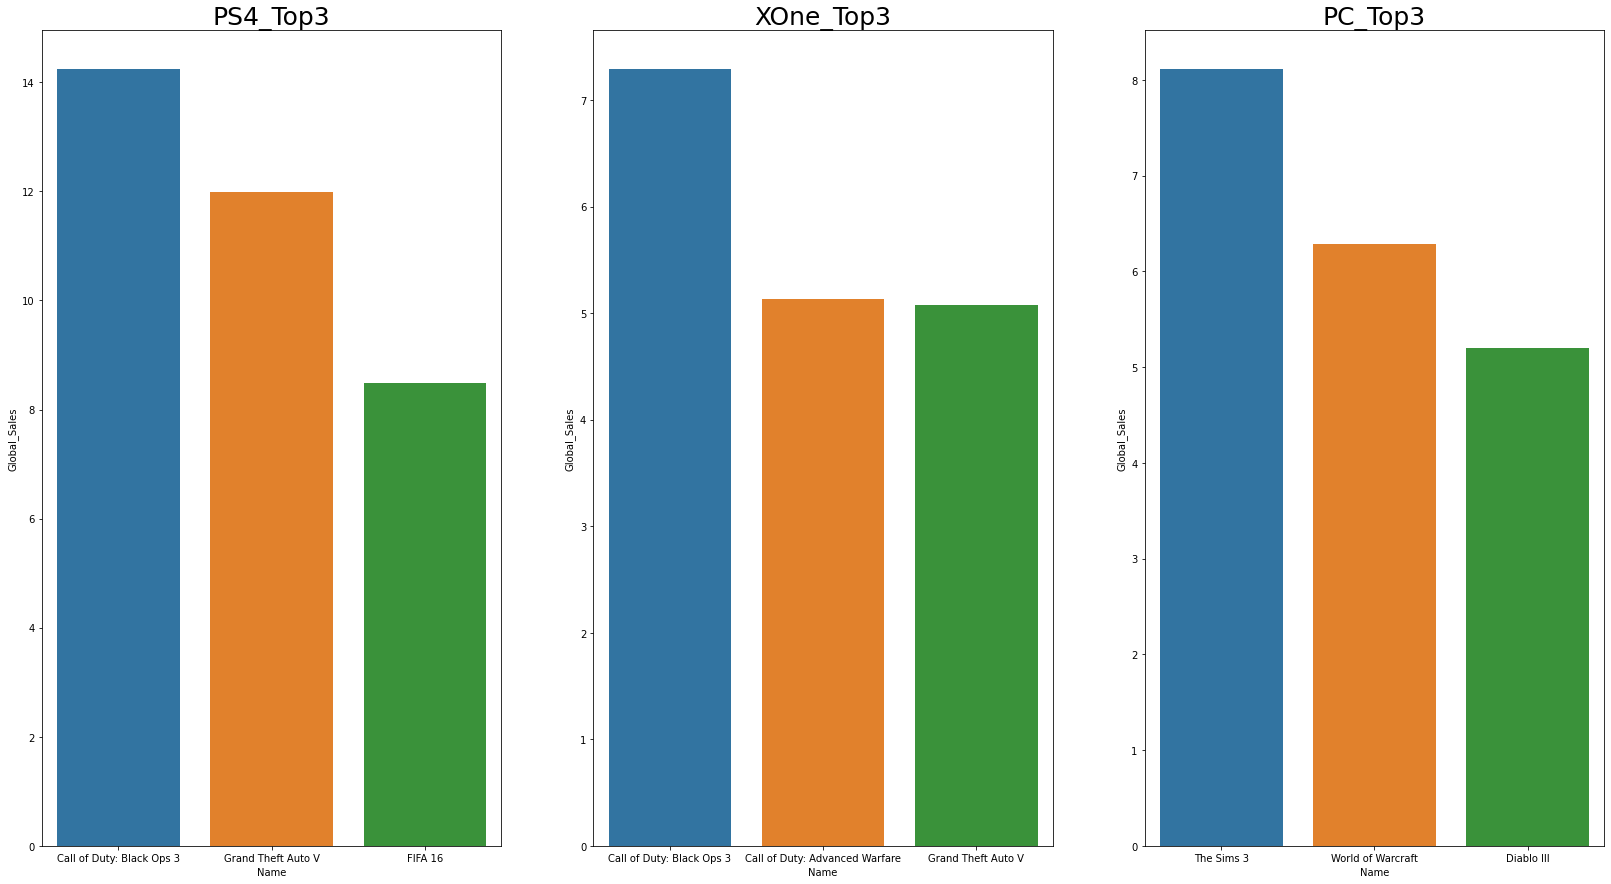

In [60]:
ps4_top3_title = ps4.sort_values('Global_Sales',ascending=False).reset_index(drop=True).loc[0:2, :]
xone_top3_title = xone.sort_values('Global_Sales',ascending=False).reset_index(drop=True).loc[0:2, :]
pc_top3_title = pc.sort_values('Global_Sales',ascending=False).reset_index(drop=True).loc[0:2, :]

fig, axs = plt.subplots(figsize=(28, 15), nrows=1, ncols=3)
sns.barplot(x='Name',y='Global_Sales',data=ps4_top3_title, ax=axs[0])
sns.barplot(x='Name',y='Global_Sales',data=xone_top3_title, ax=axs[1])
sns.barplot(x='Name',y='Global_Sales',data=pc_top3_title, ax=axs[2])

axs[0].set_title("PS4_Top3",fontsize=25)
axs[1].set_title("XOne_Top3",fontsize=25)
axs[2].set_title("PC_Top3",fontsize=25)
plt.show()

플랫폼 별 가장 많이 팔린 타이틀을 살펴 봤을 때는 PS4, XOne 에서 Call of Duty : Black Ops 3가, PC에서는 The Sims 3가 가장 많이 팔렸다.

예상 외로 가장 잘 팔린 단일 타이틀은 액션 장르가 아님(슈터, 슈터, 시뮬레이션)을 볼 수 있다. 또한 모든 플랫폼의 Top3 타이틀이 전부 시리즈 물임이 눈여겨 볼만한 점이라고 생각된다.

이번에는 플랫폼 별 Top3 발매 장르를 알아보자